In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
data = np.transpose(np.loadtxt("data for non linear.csv",delimiter = ","))
T , P = data[0],data[1]

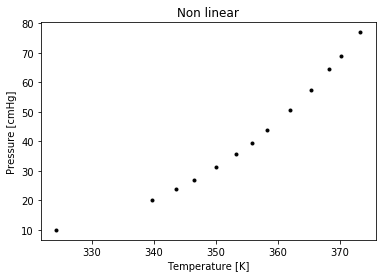

In [19]:
plt.figure()
plt.plot(T, P, '.k')
plt.title("Non linear")
plt.xlabel('Temperature [K]')
plt.ylabel('Pressure [cmHg]')
plt.show()

In [4]:
def model(T,P0,L):
    return P0*np.e**(-L/(8.314*T))

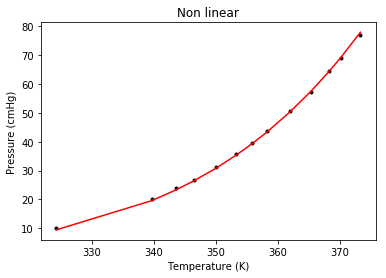

In [5]:
plt.figure()
plt.plot(T, P, '.k', label = 'non linear')
plt.plot(T, model(T,88631687,43274), 'r-', label = 'Fit')
plt.title("Non linear")
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (cmHg)')
plt.show()

Best fit parameters: 
 [5.88412887e+07 4.20342480e+04]
Covariance matrix: 
 [[5.56807681e+12 2.86353965e+08]
 [2.86353965e+08 1.47355642e+04]]


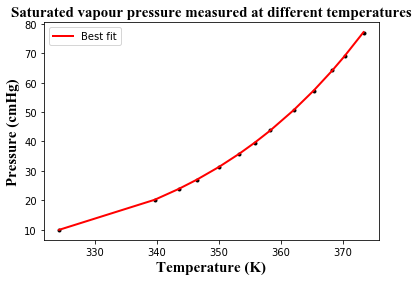

In [14]:
best_params, best_cov = opt.curve_fit(model, xdata = T, ydata = P, p0 = [88631687,40650])



print('Best fit parameters: \n', best_params)
print('Covariance matrix: \n', best_cov)


best_P0, best_L = best_params
best_fit = model(T,best_P0, best_L)


plt.figure()
plt.plot(T, P, 'k.')
plt.plot(T, best_fit, 'r-', linewidth = 2, label = 'Best fit')
plt.title("Saturated vapour pressure measured at different temperatures",fontname = 'Times New Roman', fontsize = 15)
plt.xlabel('Temperature (K)',fontname = 'Times New Roman', fontsize = 15)
plt.ylabel('Pressure (cmHg)',fontname = 'Times New Roman', fontsize = 15)
plt.legend()
plt.savefig('exp.png')
plt.show()

In [7]:
perr = np.sqrt(np.diagonal(best_cov))
print(perr)
print(best_params+perr)
print(best_params-perr)

[2.35967727e+06 1.21390132e+02]
[6.12009659e+07 4.21556382e+04]
[5.64816114e+07 4.19128579e+04]
